In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import uniform
from sklearn import datasets, neighbors, linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import csv

import warnings
warnings.filterwarnings('ignore')

# get dataframe for training and testing data with column names inputted
train_data = pd.read_csv('TrainingDataBinary.csv', header=None)
test_data = pd.read_csv('TestingDataBinary.csv', header=None)

# Split the training data into data (column 1-128 as X) and target value (column 129 as Y), with all the rows selected
X = train_data.iloc[:,:-1]
Y = train_data.iloc[:,-1:]
# print(X_train.shape, Y_train.shape)

# Randomly shuffle dataframe of train data rows to give better representation in accuracy of the model
# Split the training data into training and testing part by a ratio
# Training data need to be stratified or become balanced to improve the trainng accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=11, stratify = Y)

Y_train_df = pd.DataFrame(Y_train)
Y_train_df.value_counts()
print("Training data Y target count:", Y_train.value_counts())

Training data Y target count: 128
0      2700
1      2700
Name: count, dtype: int64


In [102]:
# define models and parameters, to get the best hyperparameters for LR classification
# Set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
c_values = [3000, 5000, 8000, 30000, 100000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


In [118]:
# Build logistic regression model
model = linear_model.LogisticRegression(C=1e5, solver = 'newton-cg', max_iter=10000)

model.fit(X_train, Y_train)

# Predict model result of training and testing data for accuracy calculation
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Crossval f1 score (5 folds):  [0.92407407 0.88055556 0.91759259 0.89259259 0.9037037 ]
Average crossval score (accuracy):  0.9037037037037037
Training Score (f1 macro):  0.9084256125968129
Testing Score (f1 macro):  0.904940587867417


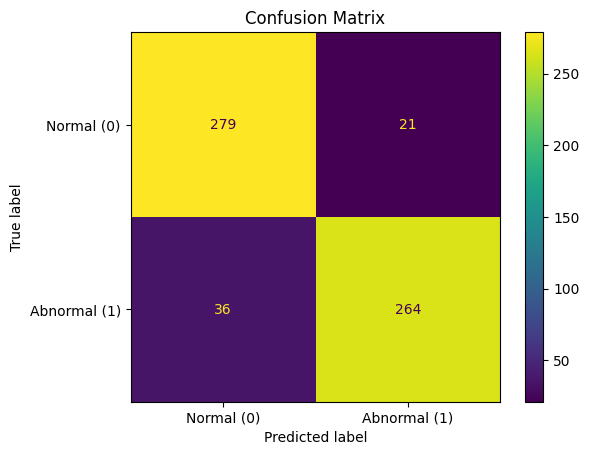

In [115]:
# Print results (cross validation score, f1_score, confusion matrix)
# Cross validation f1 score of the data
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

print("Crossval f1 score (5 folds): ", results)
avg_score = np.mean(results)
print("Average crossval score (accuracy): ", avg_score)

# Get training score and testing score
print ("Training Score (f1 macro): ",f1_score(Y_train, pred_train, average='macro'))
print ("Testing Score (f1 macro): " ,f1_score(Y_test, pred_test, average='macro'))

# Get confusion matrix
cm = confusion_matrix(Y_test, pred_test, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.xticks(tick_marks, ['Normal (0)', 'Abnormal (1)'])
plt.yticks(tick_marks, ['Normal (0)', 'Abnormal (1)'])
plt.show()

In [105]:
# Get predict result of test data from TestingDataBinary
output_label = model.predict(test_data)
print(output_label)

# Create dataframe for the label
output_df = pd.DataFrame(output_label)
output_df.value_counts()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0    51
1    49
Name: count, dtype: int64

In [117]:
#Save it to an excel file
output_df.to_csv("TestingResultsBinary.csv", index=False, header=False) 